# Raw single-cell dataset (collected by CRE)

In [44]:
import scanpy as sc
import scvi
import pandas as pd
import openpyxl

In [3]:
! ls /home/lushi02/project/sl_data/cellgene20230606/

1    154  209  264  319  374  429  484	539  594  649  703  759  813
10   155  21   265  32	 375  43   485	54   595  65   704  76	 814
100  156  210  266  320  376  430  486	540  596  650  705  760  815
101  157  211  267  321  377  431  487	541  597  651  706  761  816
102  158  212  268  322  378  432  488	542  598  652  707  762  817
103  159  213  269  323  379  433  489	543  599  653  708  763  818
104  16   214  27   324  38   434  49	544  6	  654  709  764  819
105  160  215  270  325  380  435  490	545  60   655  71   765  82
106  161  216  271  326  381  436  491	546  600  656  710  766  820
107  162  217  272  327  382  437  492	547  601  657  711  767  821
108  163  218  273  328  383  438  493	548  602  658  712  768  822
109  164  219  274  329  384  439  494	549  603  659  713  769  823
11   165  22   275  33	 385  44   495	55   604  66   714  77	 824
110  166  220  276  330  386  440  496	550  605  660  715  770  825
111  167  221  277  331  387  441  497	551  606  661  7

In [37]:
! ls /home/lushi02/project/sl_data/cellgene20230606/*/ | head -n 10

/home/lushi02/project/sl_data/cellgene20230606/1/:
local.h5ad
local.rds

/home/lushi02/project/sl_data/cellgene20230606/10/:
local.h5ad
local.rds

/home/lushi02/project/sl_data/cellgene20230606/100/:
local.h5ad
ls: write error: Broken pipe


**author.csv**

In [38]:
data_dir = "/home/lushi02/project/sl_data/cellgene20230606"
author = pd.read_csv(f"{data_dir}/author.csv")
author

,title,author
0,Single-Cell Analysis of Crohn’s Disease Lesion...,Martin，Chang，Boschetti，Ungaro，Giri，Grout，Gettl...
1,Humoral immunity at the brain borders in homeo...,Posner，Lee，Portet，Clatworthy
2,Single-cell atlas of peripheral immune respons...,Wilk，Rustagi，Zhao，Roque，Martínez-Colón，McKechn...
3,A molecular single-cell lung atlas of lethal C...,Melms，Biermann，Huang，Wang，Nair，Tagore，Katsyv，R...
4,MSK SPECTRUM – Ovarian cancer mutational proce...,Vázquez-García，Uhlitz，Ceglia，Lim，Wu，Mohibullah...
...,...,...
119,Insulin is expressed by enteroendocrine cells ...,Egozi，Llivichuzhca-Loja，McCourt，Bahar Halpern，...
120,Construction of a human cell landscape at sing...,Han，Zhou，Fei，Sun，Wang，Chen，Chen，Wang，Tang，Ge，Z...
121,COVID-19 immune features revealed by a large-s...,Ren，Wen，Fan，Hou，Su，Cai，Li，Liu，Tang，Zhang，Yang，...
122,Differential cell composition and split epider...,Wiedemann，Billi，Bocci，Kashgari，Xing，Tsoi，Melle...


**meta.csv**

In [39]:
data_dir = "/home/lushi02/project/sl_data/cellgene20230606"
meta = pd.read_csv(f"{data_dir}/meta.csv")
meta

,title,Assay,Author,Cell Count,Cell Type,Development Stage,Disease,Organism,Publication Date,Self-Reported Ethnicity,Sex,Suspension Type,Tissue
0,immune cells,10x 3' v3,NaN,35699,B cell，T cell，alveolar macrophage，dendritic ce...,60-year-old human stage，61-year-old human stag...,normal，pulmonary emphysema,Homo sapiens,2023-01-29 00:48:11.640940,European，unknown,female，male,cell,alveolus of lung
1,PBMCs,10x 5' v1,NaN,59506,"B cell，CD4-positive, alpha-beta T cell，CD8-pos...",65-79 year-old human stage，80 year-old and ove...,COVID-19，normal,Homo sapiens,2022-03-25 23:21:21.772531,unknown,unknown,cell,blood
2,Pregnant Uterus (All),10x 3' v2，Smart-seq2,NaN,70325,"CD16-negative, CD56-bright natural killer cell...",10th week post-fertilization human stage，Carne...,normal,Homo sapiens,2022-12-17 06:01:23.942557,unknown,female，male，unknown,cell,blood，decidua，placenta
3,Retina,10x 3' v2,NaN,19694,Mueller cell，OFF-bipolar cell，ON-bipolar cell，...,42-year-old human stage，53-year-old human stag...,cataract，normal,Homo sapiens,2022-04-26 17:42:03.319733,unknown,female，male,cell,retina
4,Healthy human liver: B cells,10x 3' v2，10x 3' v3,NaN,146,mature B cell，plasma cell,human adult stage，mature stage,normal,Homo sapiens,2022-01-08 02:27:42.793386,unknown,female，male,cell,caudate lobe of liver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,AT2 cells,10x 3' v3,NaN,3662,type II pneumocyte,60-year-old human stage，61-year-old human stag...,normal，pulmonary emphysema,Homo sapiens,2023-01-29 00:48:11.640940,European，unknown,female，male,cell,alveolus of lung
838,Fetal kidney dataset: full,10x 3' v2,NaN,27197,"B cell，CD4-positive, alpha-beta T cell，CD8-pos...",10th week post-fertilization human stage，12th ...,normal,Homo sapiens,2022-06-15 07:41:20.705612,unknown,female，male,cell,kidney
839,Immunophenotyping of COVID-19 and influenza hi...,10x 3' v3,NaN,59572,"CD4-positive helper T cell，CD8-positive, alpha...",38-year-old human stage，46-year-old human stag...,COVID-19，influenza，normal,Homo sapiens,2022-02-01 03:07:38.237142,unknown,female，male,cell,blood
840,Human tonsil complete integrated cell set scRNA,10x 3' v2，10x 5' v1,NaN,32607,"CD4-positive helper T cell，CD8-positive, alpha...",3-year-old human stage，5-year-old human stage，...,normal,Homo sapiens,2023-02-23 08:27:39.226567,unknown,female，male,cell,tonsil


**multi.xlsx**

```python
data_dir = "/home/lushi02/project/sl_data/cellgene20230606"
filename = f"{data_dir}/multi.xlsx"

def read_excel(filename):
    workbook = openpyxl.load_workbook(filename)
    sheet_names = workbook.sheetnames
    sheet = workbook[sheet_names[0]]
    df = pd.DataFrame(sheet.values)
    return df

multi = read_excel(filename)
multi
```

In [51]:
! ls /home/lushi02/project/sl_data/cellgene20230606/*.xlsx

/home/lushi02/project/sl_data/cellgene20230606/sampleH.xlsx


**sampleH**

In [55]:
data_dir = "/home/lushi02/project/sl_data/cellgene20230606"
filename = f"{data_dir}/sampleH.xlsx"

def read_excel(filename):
    workbook = openpyxl.load_workbook(filename)
    sheet_names = workbook.sheetnames
    print(len(sheet_names))
    sheet = workbook[sheet_names[0]]
    df = pd.DataFrame(sheet.values)
    return df

sampleH = read_excel(filename)
sampleH

1


,0,1,2
0,Tissue,uni,multi
1,blood,"2,9,31,47,91,94,95,97,98,99,100,101,103,105,10...","3,33,35,84,118,344,347,349,460,461,462,463,484..."
2,thymus,"6,281,682,683,686,731","84,428,429,460,461,462,463,534,535,538,541,542..."
3,ileum,"8,295,372,373,505","32,70,84,122,127,128,129,360,363,364,365,366,3..."
4,respiratory airway,"28,58,86,87,88,89,90,92,93,96,102,104,107,108,...","466,698,719"
5,small intestine,"30,810","496,503,523,555,571,768,776,787,788,790"
6,bone marrow,"36,482,485,486,497,529,550,705,801","35,84,118,460,461,462,463,484,534,535,538,541,..."
7,bronchial epithelial cell,43,None
8,ovary,"53,54,837","7,10,84,297,298,299"
9,gonad,"81,82,83,539,547",None


**h5ad**

In [5]:
data_dir = "/home/lushi02/project/sl_data/cellgene20230606"
# adata = scvi.data.pbmc_dataset()
adata = sc.read_h5ad("/home/lushi02/project/sl_data/cellgene20230606/1/local.h5ad")

In [6]:
type(adata)

anndata._core.anndata.AnnData

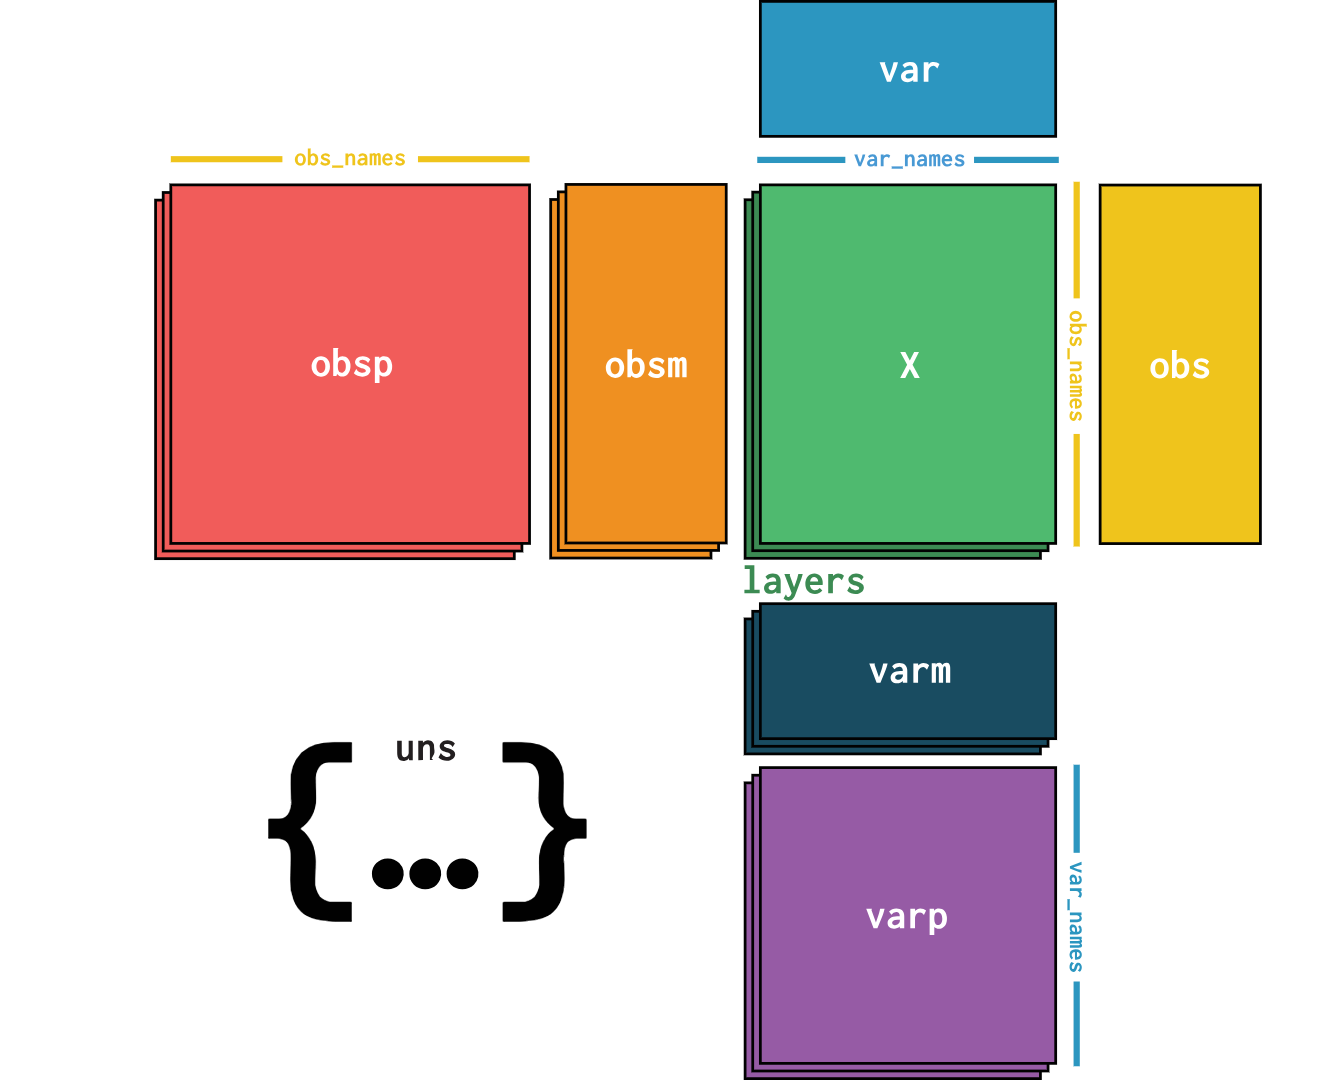

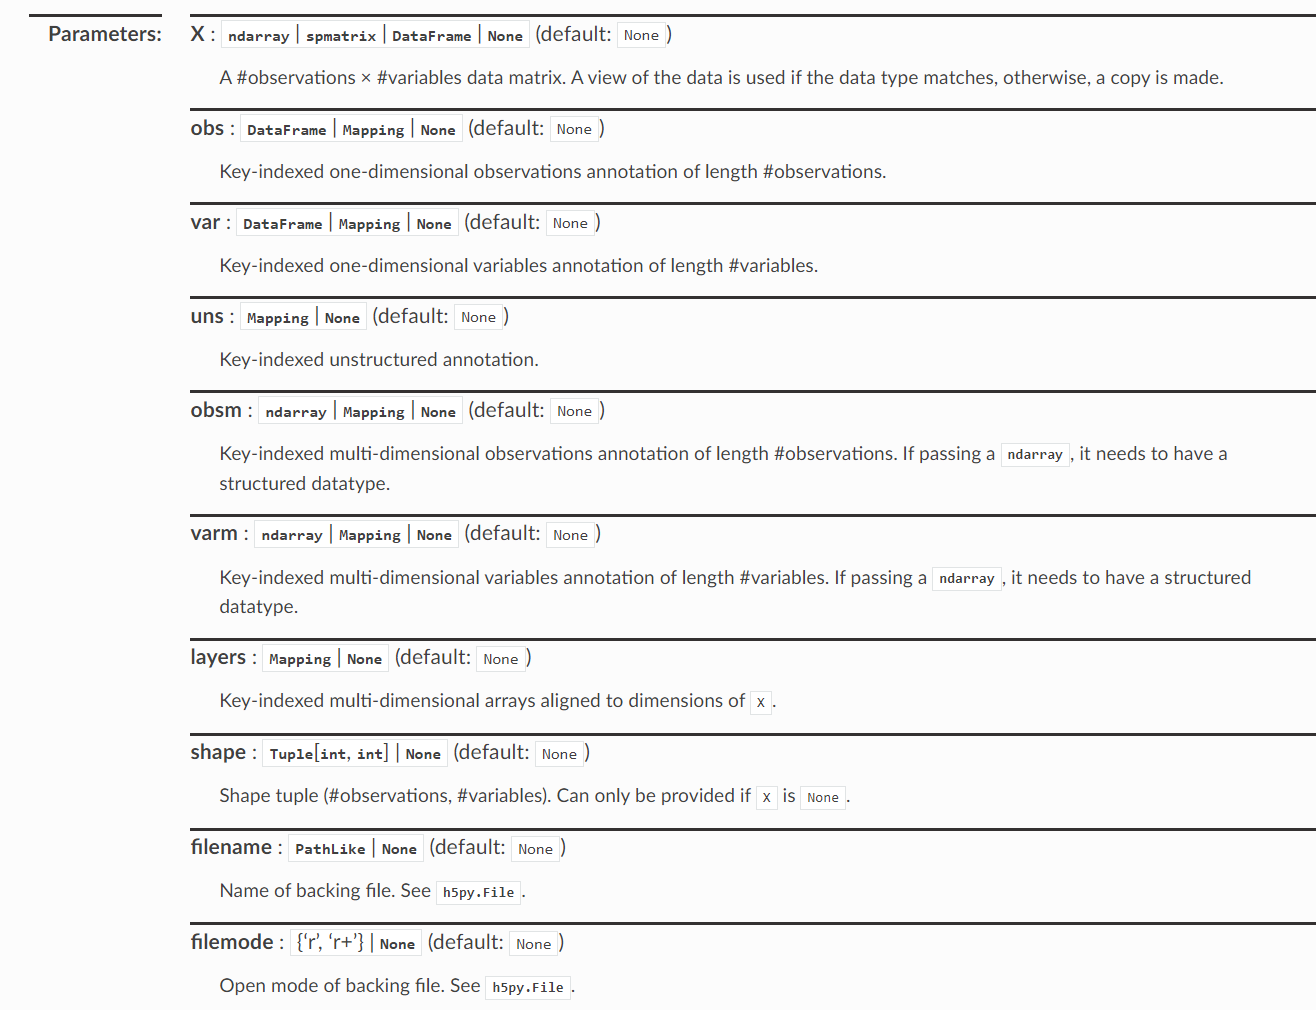

最核心的X是个稀疏矩阵，shape为35699x24185 ,表示#observations (细胞): 35699, #variables（基因）: 24185

In [7]:
adata.X

<35699x24185 sparse matrix of type '<class 'numpy.float32'>'
	with 68615395 stored elements in Compressed Sparse Row format>

In [8]:
adata.obs

,donor_id,nCount_RNA,nFeature_RNA,percent.mt,seurat_clusters,celltype,organism_ontology_term_id,assay_ontology_term_id,self_reported_ethnicity_ontology_term_id,tissue_ontology_term_id,...,cell_type_ontology_term_id,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGCGTTCAT-1_1,NL1,2064.0,978,8.624031,1,T cell,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,CL:0000084,cell,T cell,10x 3' v3,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage
AAACCCAGTCCTCCAT-1_1,NL1,2084.0,1106,7.869482,0,T cell,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,CL:0000084,cell,T cell,10x 3' v3,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage
AAACCCAGTCGCATGC-1_1,NL1,16808.0,3587,5.021418,2,Monocyte,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,CL:0000576,cell,monocyte,10x 3' v3,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage
AAACCCATCAAACGTC-1_1,NL1,2377.0,1001,7.824989,0,T cell,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,CL:0000084,cell,T cell,10x 3' v3,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage
AAACGAAAGCACGATG-1_1,NL1,9414.0,2704,9.400892,4,Monocyte,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,CL:0000576,cell,monocyte,10x 3' v3,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGTTATGGA-1_6,Emp3,6262.0,1875,8.304056,6,Mast cell,NCBITaxon:9606,EFO:0009922,unknown,UBERON:0002299,...,CL:0000097,cell,mast cell,10x 3' v3,pulmonary emphysema,Homo sapiens,female,alveolus of lung,unknown,73-year-old human stage
TTTGTTGGTAGCTGTT-1_6,Emp3,4263.0,1886,5.254516,3,NK cell,NCBITaxon:9606,EFO:0009922,unknown,UBERON:0002299,...,CL:0000623,cell,natural killer cell,10x 3' v3,pulmonary emphysema,Homo sapiens,female,alveolus of lung,unknown,73-year-old human stage
TTTGTTGGTATGTCTG-1_6,Emp3,4290.0,1610,2.680653,0,T cell,NCBITaxon:9606,EFO:0009922,unknown,UBERON:0002299,...,CL:0000084,cell,T cell,10x 3' v3,pulmonary emphysema,Homo sapiens,female,alveolus of lung,unknown,73-year-old human stage


In [9]:
adata.var

,name,feature_is_filtered,feature_name,feature_reference,feature_biotype
gene_ids,,,,,
ENSG00000238009,RP11-34P13.7,False,RP11-34P13.7,NCBITaxon:9606,gene
ENSG00000279457,FO538757.2,False,WASH9P,NCBITaxon:9606,gene
ENSG00000228463,AP006222.2,False,AP006222.1,NCBITaxon:9606,gene
ENSG00000237094,RP4-669L17.10,False,RP4-669L17.4,NCBITaxon:9606,gene
ENSG00000230021,RP5-857K21.4,False,RP11-206L10.17,NCBITaxon:9606,gene
...,...,...,...,...,...
ENSG00000273214,RP5-1039K5.18,False,RP5-1039K5.18,NCBITaxon:9606,gene
ENSG00000272940,CTA-384D8.33,False,CTA-384D8.33,NCBITaxon:9606,gene
ENSG00000280441,CH507-528H12.1,False,CH507-528H12.1,NCBITaxon:9606,gene


**uns**

In [10]:
adata.uns

OverloadedDict, wrapping:
	{'cell_type_ontology_term_id_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf'], dtype=object), 'schema_version': '3.0.0', 'seurat_clusters_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'],
      dtype=object), 'title': 'immune cells'}
With overloaded keys:
	['neighbors'].

In [18]:
import numpy as np
import json
def convert_numpy_arrays(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    return obj

print(json.dumps(dict(adata.uns), indent=4, default=convert_numpy_arrays))
# from pprint import pprint
# pprint(dict(adata.uns))

{
    "cell_type_ontology_term_id_colors": [
        "#1f77b4",
        "#ff7f0e",
        "#279e68",
        "#d62728",
        "#aa40fc",
        "#8c564b",
        "#e377c2",
        "#b5bd61",
        "#17becf"
    ],
    "schema_version": "3.0.0",
    "seurat_clusters_colors": [
        "#1f77b4",
        "#ff7f0e",
        "#279e68",
        "#d62728",
        "#aa40fc",
        "#8c564b",
        "#e377c2",
        "#b5bd61",
        "#17becf",
        "#aec7e8",
        "#ffbb78"
    ],
    "title": "immune cells"
}


**obsm**

In [19]:
adata.obsm

AxisArrays with keys: X_pca, X_umap

In [21]:
print(type(adata.obsm))

<class 'anndata._core.aligned_mapping.AxisArrays'>


In [22]:
adata.obsm["X_pca"]

array([[ 8.15829645,  2.50417764,  0.87227872, ...,  0.45067594,
        -1.06975052,  0.67638658],
       [ 7.42442257,  2.67851526, -0.09563832, ..., -0.57846101,
        -0.17674004, -0.40847714],
       [10.15194595,  3.66961801,  3.96442477, ...,  0.01184659,
        -1.00439585,  0.3096064 ],
       ...,
       [ 7.13389829,  2.15480338, -0.36918904, ..., -2.31241137,
        -0.86452228, -0.83707594],
       [ 7.87543878,  2.54148385,  0.46344614, ..., -0.19747237,
        -0.94007287,  2.85989227],
       [ 8.01757026,  2.08947317,  1.60987347, ...,  0.47471538,
         0.36560495,  0.1523701 ]])

In [23]:
adata.obsm["X_umap"]

array([[-7.66708045, -4.00421686],
       [-7.50625472,  5.27298646],
       [ 9.27057691,  3.79527621],
       ...,
       [-8.62394194,  3.39439755],
       [-7.50672869, -3.60829706],
       [ 0.49618382, 16.24190478]])

**varm**

In [25]:
adata.varm

AxisArrays with keys: 

**layers**

In [26]:
adata.layers

Layers with keys: 

**shape**

In [27]:
adata.shape

(35699, 24185)

**filename**

In [28]:
adata.filename

**filemode**

In [29]:
adata.filemode

AttributeError: 'AnnData' object has no attribute 'filemode'

In [33]:
vars(adata).keys()

dict_keys(['_is_view', '_adata_ref', '_oidx', '_vidx', 'file', '_X', '_n_obs', '_n_vars', '_obs', '_var', '_uns', '_obsm', '_varm', '_obsp', '_varp', '_raw', '_layers'])

In [32]:
vars(adata)

{'_is_view': False,
 '_adata_ref': None,
 '_oidx': None,
 '_vidx': None,
 'file': Backing file manager: no file is set.,
 '_X': <35699x24185 sparse matrix of type '<class 'numpy.float32'>'
 	with 68615395 stored elements in Compressed Sparse Row format>,
 '_n_obs': 35699,
 '_n_vars': 24185,
 '_obs':                      donor_id  nCount_RNA  nFeature_RNA  percent.mt  \
 index                                                                 
 AAACCCAAGCGTTCAT-1_1      NL1      2064.0           978    8.624031   
 AAACCCAGTCCTCCAT-1_1      NL1      2084.0          1106    7.869482   
 AAACCCAGTCGCATGC-1_1      NL1     16808.0          3587    5.021418   
 AAACCCATCAAACGTC-1_1      NL1      2377.0          1001    7.824989   
 AAACGAAAGCACGATG-1_1      NL1      9414.0          2704    9.400892   
 ...                       ...         ...           ...         ...   
 TTTGTTGAGTTATGGA-1_6     Emp3      6262.0          1875    8.304056   
 TTTGTTGGTAGCTGTT-1_6     Emp3      4263.0          

**.rds**

In [57]:
import pyreadr
data_dir = "/home/lushi02/project/sl_data/cellgene20230606"
filename = f"{data_dir}/1/local.rds"
rds = pyreadr.read_r(filename)
print(type(rds))

LibrdataError: The file contains an unrecognized object

In [61]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

data_dir = "/home/lushi02/project/sl_data/cellgene20230606"
filename = f"{data_dir}/1/local.rds"
r_code = f"my_data <- readRDS('{filename}')"
robjects.r(r_code)
robjects.r['my_data']

<rpy2.robjects.methods.RS4 object at 0x2b0a9478df00> [RTYPES.S4SXP]
R classes: ('Seurat',)

In [62]:
type(robjects.r['my_data'])

rpy2.robjects.methods.RS4